In [503]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Load Data

In [504]:
for x in range(len(db['tail'])):
    if(db['tail'][x]=="yes"):
        db.loc[x, "tail"] = 1
    else:
        db.loc[x, "tail"] = 0
db

message  fingers tail   species
0                                   pluvia arbor aquos        4    0    Aquari
1                            cosmix xeno nebuz odbitaz        5    1   Zorblax
2                   solarix glixx novum galaxum quasar        5    1   Zorblax
3             arbor insectus pesros ekos dootix nimbus        2    1   Florian
4                    mermax drakos lorix epikoz deftax        4    0    Faerix
..                                                 ...      ...  ...       ...
495  empathix sadix disgux dredax pridius afgstix e...        2    0  Emotivor
496                      quasar ustron nebulax meteorn        4    0   Quixnar
497                 astron xeno ceaestar astron kometa        6    1   Zorblax
498  sporzom nimbus terram terranix aviana ekos nimbub        2    1   Florian
499     blastix titanos relikum drakos gryphox sirenix        4    1   Mythron

[500 rows x 4 columns]

In [505]:
X = df[['message','fingers','tail']]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

**Feature Enginerring**

In [506]:
tfidf = TfidfVectorizer()
onehot = ColumnTransformer([('fingers_tail', OneHotEncoder(handle_unknown='ignore'), ['fingers','tail'])], remainder='passthrough')

**Hyperparameters Tuning..**

In [507]:
param_grid = {
    'features__tfidf__max_features': [500, 1000, 1500],      
    'features__tfidf__ngram_range': [(1, 1), (1, 2)],        
    'features__tfidf__max_df': [0.7, 0.9],                   
    'features__tfidf__min_df': [0.01, 0.05],                 
    'features__tfidf__use_idf': [True, False],              
    'clf__C': [0.1, 1, 10, 100, 1000],   
    'clf__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10], 
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

**Writing pipelines for model..**

In [508]:
pipeline = Pipeline([
    ('features', ColumnTransformer([
        ('tfidf', tfidf, 'message'),
        ('onehot', onehot, ['fingers', 'tail'])
    ])),
    ('clf', SVC())
])

**Implementing grid search to fine tune the hyperparamters..**

In [509]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
[CV] END clf__C=0.1, clf__gamma=scale, clf__kernel=linear, features__tfidf__max_df=0.7, features__tfidf__max_features=500, features__tfidf__min_df=0.01, features__tfidf__ngram_range=(1, 1), features__tfidf__use_idf=False; total time=   0.0s
[CV] END clf__C=0.1, clf__gamma=scale, clf__kernel=linear, features__tfidf__max_df=0.7, features__tfidf__max_features=500, features__tfidf__min_df=0.01, features__tfidf__ngram_range=(1, 1), features__tfidf__use_idf=True; total time=   0.0s
[CV] END clf__C=0.1, clf__gamma=scale, clf__kernel=linear, features__tfidf__max_df=0.7, features__tfidf__max_features=500, features__tfidf__min_df=0.01, features__tfidf__ngram_range=(1, 1), features__tfidf__use_idf=True; total time=   0.0s
[CV] END clf__C=0.1, clf__gamma=scale, clf__kernel=linear, features__tfidf__max_df=0.7, features__tfidf__max_features=500, features__tfidf__min_df=0.01, features__tfidf__ngram_range=(1, 1), features__tfidf__use_id

**Model Evaluation in training set..**

In [491]:
y_pred_train = grid_search.best_estimator_.predict(X_train)
grid_search_train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_train_accuracy = accuracy_score(y_train, y_pred_train)


In [500]:
print("Accuracy in training set:",y_pred_train_accuracy*100)

Accuracy in training set: 90.5


*Testing and Evaluation of test set..*


In [501]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in test set:",accuracy*100)

Accuracy in test set: 87.0


**Visualising the confusion matrix...**

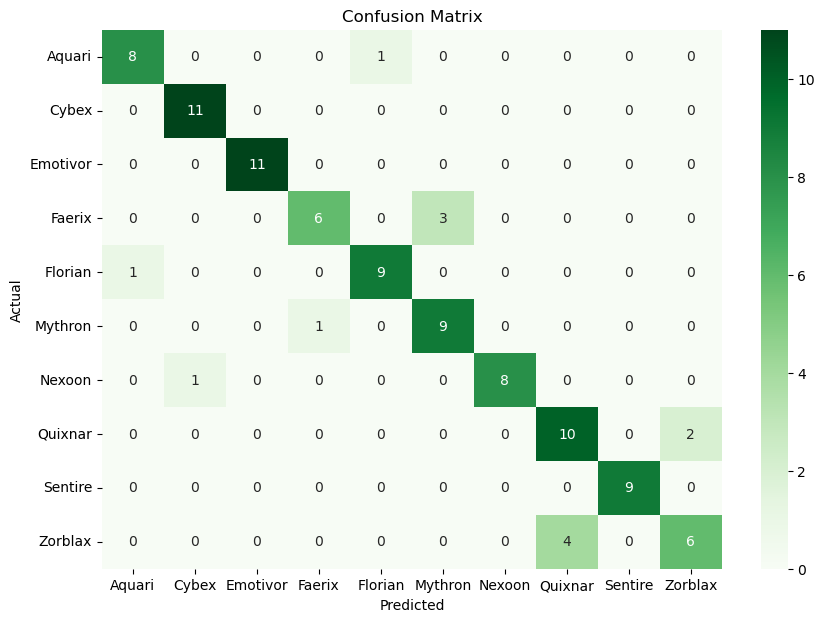

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
test = pd.read_csv('test.csv')
predictions = grid_search.best_estimator_.predict(test)
predictions = pd.DataFrame(predictions, columns=['Species'])
predictions.to_csv('result.csv', index=False)


(636,)
